In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pprint as pp
import seaborn as sns
from google.colab import files

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
# I copied the train data to my main drive and named it "Copy_of_train.csv"
path = "/content/gdrive/My Drive/Copy_of_train.csv"
#path = "/content/gdrive/My Drive/SMAK Data Science/train.csv"
with open(path, 'rb') as f:
  df = pd.read_csv(f)
print("Finished reading data!")

Finished reading data!


In [8]:
df.head()

,date,song,artist,peak_rank,weeks_on_board,spotify_id,spotify_song,spotify_artist,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,1958,Poor Little Fool,Ricky Nelson,1,11,0p1c2oNEQDd9MF1H3R9p3z,Poor Little Fool,Ricky Nelson,0.6710,https://api.spotify.com/v1/audio-analysis/0p1c...,0.534,153960,0.493,0.000007,0,0.214,-7.008,1,0.0304,155.507,4,https://api.spotify.com/v1/tracks/0p1c2oNEQDd9...,audio_features,spotify:track:0p1c2oNEQDd9MF1H3R9p3z,0.795
1,1958,Rock-in Robin,Bobby Day,2,21,4FlYcJnfkeBpowEHJ72Bmt,Rockin' Robin,Bobby Day,0.2980,https://api.spotify.com/v1/audio-analysis/4FlY...,0.541,160080,0.608,0.000000,7,0.234,-13.083,1,0.1060,171.992,4,https://api.spotify.com/v1/tracks/4FlYcJnfkeBp...,audio_features,spotify:track:4FlYcJnfkeBpowEHJ72Bmt,0.938
2,1958,Bird Dog,The Everly Brothers,2,18,2ZCkqAo0tzzCVOth7ityh5,Bird Dog,The Everly Brothers,0.6860,https://api.spotify.com/v1/audio-analysis/2ZCk...,0.658,136427,0.706,0.000002,11,0.166,-9.076,1,0.0354,141.194,4,https://api.spotify.com/v1/tracks/2ZCkqAo0tzzC...,audio_features,spotify:track:2ZCkqAo0tzzCVOth7ityh5,0.965
3,1958,Patricia,Perez Prado And His Orchestra,2,14,205EtD8tQnHDXMkmtYiaHF,Patricia,Pérez Prado,0.0862,https://api.spotify.com/v1/audio-analysis/205E...,0.704,140867,0.638,0.251000,1,0.115,-9.522,1,0.0457,137.396,4,https://api.spotify.com/v1/tracks/205EtD8tQnHD...,audio_features,spotify:track:205EtD8tQnHDXMkmtYiaHF,0.837
4,1958,My True Love,Jack Scott,3,14,2Un1O9CChp4wyTmt422XwW,My True Love,Jack Scott,0.8710,https://api.spotify.com/v1/audio-analysis/2Un1...,0.548,165027,0.253,0.000099,4,0.138,-11.387,1,0.0279,68.184,3,https://api.spotify.com/v1/tracks/2Un1O9CChp4w...,audio_features,spotify:track:2Un1O9CChp4wyTmt422XwW,0.238


In [9]:
#df = pd.read_csv("/pop_songs_data.csv")

In [10]:
year_artist_uniq = []

for year in range(1958, 2021):
    this_year = df.loc[df['date'] == year]
    # date, avg_peak_rank, avg_weaks_on_board, avg_accousticness, avg_danceability, avg_duration_ms, 
    # avg_energy, avg_instrumentalness, avg_liveness, avg_loudness, avg_speechiness, avg_tempo, avg_valence
    this_info = []
    for col in ['artist']:
        this_info.append(this_year[col])
        info_arr = np.array(this_info)
    year_artist_uniq.append([year, len(np.unique(info_arr))])

pp.pprint(year_artist_uniq[0])

[1958, 48]


In [11]:
# I commented this out
year_avg_data = []

for year in range(1958, 2021):
    this_year = df.loc[df['date'] == year]
    # date, avg_peak_rank, avg_weaks_on_board, avg_accousticness, avg_danceability, avg_duration_ms, 
    # avg_energy, avg_instrumentalness, avg_liveness, avg_loudness, avg_speechiness, avg_tempo, avg_valence
    this_info = []
    for col in ['date', 'peak_rank', 'weeks_on_board', 'acousticness', 'danceability', 'duration_ms', 'energy', 
                'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']:
        this_info.append(this_year[col].mean())
    year_avg_data.append(this_info)
    

In [12]:
#pp.pprint(year_avg_data)

In [13]:
cols = ['date', 'avg_peak_rank', 'avg_weaks_on_board', 'avg_accousticness', 
        'avg_danceability', 'avg_duration_ms', 'avg_energy', 'avg_instrumentalness', 
        'avg_liveness', 'avg_loudness', 'avg_speechiness', 'avg_tempo', 'avg_valence']

In [14]:
year_avgs_df = pd.DataFrame(year_avg_data, columns=cols)

In [15]:
year_artist_uniq_df = pd.DataFrame(year_artist_uniq, columns=['date', 'artist_num'])

In [16]:
def make_all_data_scatter_plot(metric):
  curr_data = df.loc[df[metric]]
  scatter_plot = sns.scatterplot()

In [17]:
def make_bar_plot(for_y):
  bar_plot = sns.catplot(data=year_avgs_df,
            kind="bar",
            x='date',
            y= for_y,
            height=5,
            aspect=6
            ).set(
                title= for_y + ' per year'
            )
  return bar_plot

In [18]:
def make_bar_plot_artist_uniq():
  bar_plot = sns.lineplot(data=year_artist_uniq_df,
            x='date',
            y='artist_num',
            ).set(
                title= "artist_num" + ' per year'
            )
  return bar_plot

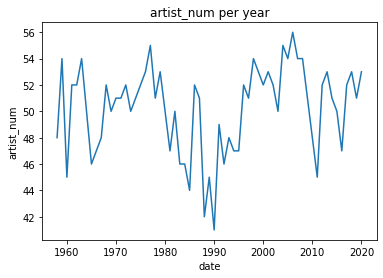

In [20]:
def print_bar_plot_artist_uniq():
    plot = make_bar_plot_artist_uniq()
    # plot.savefig("artist_uniq" + '_output.png')
    # files.download("artist_uniq" + '_output.png')

print_bar_plot_artist_uniq()
